# **Install kaggle and download dataset**




In [ ]:
!pip install -q kaggle

In [ ]:
#
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karnashish1610","key":"6a2bd89fb73985ce4fec2aa086579c26"}'}

In [ ]:
# create a kaggle directory
!mkdir ~/.kaggle

In [ ]:
# copy kaggle.json in kaggle directory
! cp kaggle.json ~/.kaggle/

In [ ]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                      Vehicle Sales Data                             19MB  2024-02-21 20:16:17           3336         58  1.0              
nelgiriyewithana/apple-quality                          Apple Quality                                 170KB  2024-01-11 14:31:07          22981        502  1.0              
tarunrm09/climate-change-indicators                     Climate change Indicators                      34KB  2024-02-22 08:53:54           1577         42  1.0              
mikhail1681/walmart-sales                               Walmart Sales                                 122KB  2024-02-13 17:35:56  

In [ ]:
# download kaggle dataset
! kaggle competitions download -c playground-series-s4e2

  0% 0.00/917k [00:00<?, ?B/s]
100% 917k/917k [00:00<00:00, 93.3MB/s]


In [ ]:
!unzip playground-series-s4e2.zip

Archive:  playground-series-s4e2.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#**Import basic libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score

#**Load & process data**

In [ ]:
# Read data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


**Remove unnecessary columns from datasets**

In [ ]:
ids = test['id']
test = test.drop('id', axis=1)
train = train.drop('id', axis=1)
test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


**Data normalization/scalling**

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# scale the numeric data
numeric_cols = train.select_dtypes(include='number').columns
train[numeric_cols]=scaler.fit_transform(train[numeric_cols])
test[numeric_cols]=scaler.fit_transform(test[numeric_cols])

In [ ]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,0.222192,0.475586,0.338497,yes,yes,0.500000,0.661099,Sometimes,no,0.881787,no,0.000000,0.488237,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,0.085106,0.209260,0.142792,yes,yes,0.500000,0.666667,Frequently,no,0.500000,no,0.333333,0.500000,no,Automobile,Normal_Weight
2,Female,0.085106,0.497391,0.088577,yes,yes,0.440267,0.137228,Sometimes,no,0.455189,no,0.288682,0.836792,no,Public_Transportation,Insufficient_Weight
3,Female,0.147931,0.496002,0.732007,yes,yes,1.000000,0.666667,Sometimes,no,0.337031,no,0.489288,0.390099,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,0.375342,0.883049,0.434708,yes,yes,0.839832,0.323824,Sometimes,no,0.489924,no,0.655991,0.465861,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,0.274466,0.751498,0.647675,yes,yes,0.969308,0.666667,Sometimes,no,0.912815,no,0.285133,0.000000,Sometimes,Public_Transportation
1,Female,0.148936,0.283019,0.214188,yes,yes,0.500000,0.000000,Sometimes,no,1.000000,no,0.333333,0.000000,Sometimes,Public_Transportation
2,Female,0.255319,0.364821,0.575933,yes,yes,1.000000,0.666667,Sometimes,no,0.810939,no,0.000000,0.125251,Sometimes,Public_Transportation
3,Male,0.148495,0.194579,0.513014,yes,yes,0.500000,0.659303,Sometimes,no,0.893209,no,0.031617,0.000000,Sometimes,Public_Transportation
4,Female,0.255319,0.334709,0.522265,yes,yes,1.000000,0.666667,Sometimes,no,0.826766,no,0.000000,0.370534,Sometimes,Public_Transportation


In [ ]:
# train = train.drop('NObeyesdad', axis=1)


In [ ]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,0.222192,0.475586,0.338497,yes,yes,0.500000,0.661099,Sometimes,no,0.881787,no,0.000000,0.488237,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,0.085106,0.209260,0.142792,yes,yes,0.500000,0.666667,Frequently,no,0.500000,no,0.333333,0.500000,no,Automobile,Normal_Weight
2,Female,0.085106,0.497391,0.088577,yes,yes,0.440267,0.137228,Sometimes,no,0.455189,no,0.288682,0.836792,no,Public_Transportation,Insufficient_Weight
3,Female,0.147931,0.496002,0.732007,yes,yes,1.000000,0.666667,Sometimes,no,0.337031,no,0.489288,0.390099,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,0.375342,0.883049,0.434708,yes,yes,0.839832,0.323824,Sometimes,no,0.489924,no,0.655991,0.465861,Sometimes,Public_Transportation,Overweight_Level_II


**One-hot encoding**

In [ ]:
# encode non numeric data

encoder = LabelEncoder()

nonNumeric_cols = train.select_dtypes(include='object').columns



In [ ]:
train[nonNumeric_cols]=train[nonNumeric_cols].apply(encoder.fit_transform)

In [ ]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0.222192,0.475586,0.338497,1,1,0.500000,0.661099,2,0,0.881787,0,0.000000,0.488237,1,3,6
1,0,0.085106,0.209260,0.142792,1,1,0.500000,0.666667,1,0,0.500000,0,0.333333,0.500000,2,0,1
2,0,0.085106,0.497391,0.088577,1,1,0.440267,0.137228,2,0,0.455189,0,0.288682,0.836792,2,3,0
3,0,0.147931,0.496002,0.732007,1,1,1.000000,0.666667,2,0,0.337031,0,0.489288,0.390099,1,3,4
4,1,0.375342,0.883049,0.434708,1,1,0.839832,0.323824,2,0,0.489924,0,0.655991,0.465861,1,3,6


In [ ]:
nonNumeric_cols_test = test.select_dtypes(include='object').columns
test[nonNumeric_cols_test]=test[nonNumeric_cols_test].apply(encoder.fit_transform)

In [ ]:
test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.274466,0.751498,0.647675,1,1,0.969308,0.666667,2,0,0.912815,0,0.285133,0.000000,2,3
1,0,0.148936,0.283019,0.214188,1,1,0.500000,0.000000,2,0,1.000000,0,0.333333,0.000000,2,3
2,0,0.255319,0.364821,0.575933,1,1,1.000000,0.666667,2,0,0.810939,0,0.000000,0.125251,2,3
3,1,0.148495,0.194579,0.513014,1,1,0.500000,0.659303,2,0,0.893209,0,0.031617,0.000000,2,3
4,0,0.255319,0.334709,0.522265,1,1,1.000000,0.666667,2,0,0.826766,0,0.000000,0.370534,2,3


#**Random Forest model: Training/validation & test**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = train.drop('NObeyesdad', axis=1)
y = train['NObeyesdad']
features = X.columns.values.tolist()
print(features)

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 55)

**Hyper parameter tuning**

In [ ]:
min_samples_split_list = [2,4,6,8,10,20, 30,40, 50, 100, 200, 300,400,500, 1000]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

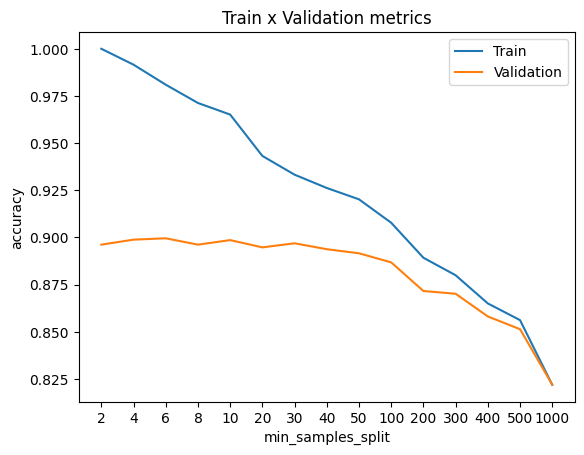

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:

    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 55).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the validation dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

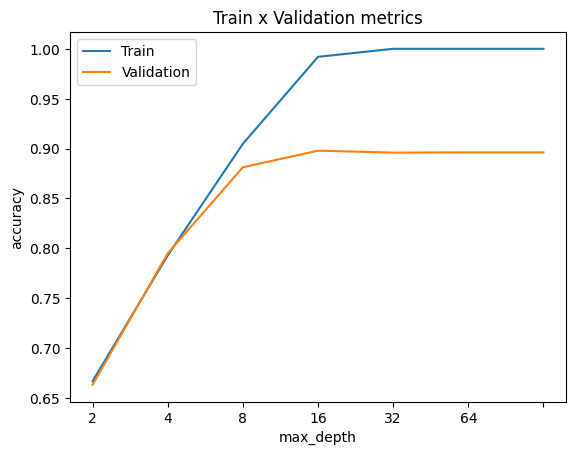

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:

    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 55).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the validation dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

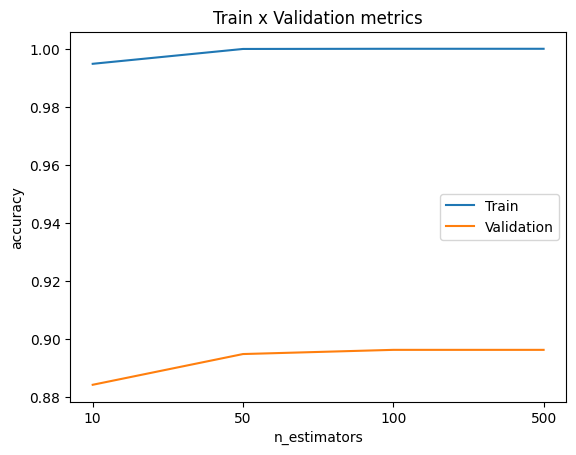

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:

    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 55).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the validation dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

**Final Random Forest model with tuned hyperparameters**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=16, min_samples_split=30).fit(X_train, y_train)

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(rf_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(rf_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9317
Metrics test:
	Accuracy score: 0.8928


In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8928227360308285

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       486
           1       0.84      0.88      0.86       616
           2       0.88      0.85      0.87       592
           3       0.95      0.97      0.96       644
           4       1.00      1.00      1.00       823
           5       0.80      0.75      0.78       487
           6       0.78      0.81      0.80       504

    accuracy                           0.89      4152
   macro avg       0.88      0.88      0.88      4152
weighted avg       0.89      0.89      0.89      4152



In [ ]:
preds_prob = rf_model.predict_proba(test)
Predictions = np.argmax(preds_prob,axis=1)
submission_df = pd.DataFrame({"id":ids,"NObeyesdad":Predictions})

In [ ]:
submission_df.head()

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4


In [ ]:
decoders = {
    0:"Insufficient_Weight",
    1:"Normal_Weight",
    2:"Obesity_Type_I",
    3:"Obesity_Type_II",
    4:"Obesity_Type_III",
    5:"Overweight_Level_I",
    6:"Overweight_Level_II",
}
submission_df["NObeyesdad"]  = submission_df["NObeyesdad"].map(decoders)

In [ ]:
# Save submission file
submission_df.to_csv('submission.csv',index=False)

In [ ]:
submission_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


#**Neural Network based Model: Training/validation & testing**

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

In [ ]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.222192,0.475586,0.338497,1,1,0.500000,0.661099,2,0,0.881787,0,0.000000,0.488237,1,3
1,0,0.085106,0.209260,0.142792,1,1,0.500000,0.666667,1,0,0.500000,0,0.333333,0.500000,2,0
2,0,0.085106,0.497391,0.088577,1,1,0.440267,0.137228,2,0,0.455189,0,0.288682,0.836792,2,3
3,0,0.147931,0.496002,0.732007,1,1,1.000000,0.666667,2,0,0.337031,0,0.489288,0.390099,1,3
4,1,0.375342,0.883049,0.434708,1,1,0.839832,0.323824,2,0,0.489924,0,0.655991,0.465861,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,0.236959,0.602336,0.596452,1,1,0.959792,0.666667,2,0,0.575905,0,0.443506,0.098340,1,3
20754,1,0.085106,0.494613,0.087262,0,1,1.000000,1.000000,1,0,0.000000,0,0.666667,0.500000,1,3
20755,1,0.129809,0.703030,0.528177,1,1,0.703909,0.666667,2,0,0.500000,0,0.386013,0.599220,2,3
20756,1,0.422403,0.475590,0.353174,1,1,0.835619,0.323824,2,0,0.572419,0,0.000000,0.486917,2,0


**Model Description**

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))  # Adjust neuron count
# model.add(Dropout(0.2))  # Regularization
model.add(Dense(16, activation='relu'))  # Adjust neuron count
# model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))  # Adjust neuron count
# model.add(Dropout(0.2))
model.add(Dense(y.nunique(), activation='softmax'))  # Output layer with number of classes



In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0015),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=80)  # Adjust epochs


Epoch 1/150
519/519 [==============================] - 2s 2ms/step - loss: 1.1676 - accuracy: 0.5417
Epoch 2/150
519/519 [==============================] - 1s 2ms/step - loss: 0.6049 - accuracy: 0.7774
Epoch 3/150
519/519 [==============================] - 1s 3ms/step - loss: 0.4771 - accuracy: 0.8285
Epoch 4/150
519/519 [==============================] - 2s 4ms/step - loss: 0.4455 - accuracy: 0.8394
Epoch 5/150
519/519 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8454
Epoch 6/150
519/519 [==============================] - 1s 2ms/step - loss: 0.4254 - accuracy: 0.8467
Epoch 7/150
519/519 [==============================] - 1s 2ms/step - loss: 0.4181 - accuracy: 0.8516
Epoch 8/150
519/519 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8522
Epoch 9/150
519/519 [==============================] - 1s 2ms/step - loss: 0.4145 - accuracy: 0.8505
Epoch 10/150
519/519 [==============================] - 1s 2ms/step - loss: 0.4115 - accura

In [ ]:
y_val_pred = model.predict(X_val)

130/130 [==============================] - 0s 1ms/step


In [ ]:
val_loss, val_acc = model.evaluate(X_val,y_val)

130/130 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8654


In [ ]:
print(val_loss)
print(val_acc)

0.4024417996406555
0.8653661012649536


In [ ]:
preds_prob = model.predict(test)
Predictions = np.argmax(preds_prob,axis=1)
submission_df = pd.DataFrame({"id":ids,"NObeyesdad":Predictions})
# Predictions = model.predict(test)
# submission_df = pd.DataFrame({"id":ids,"NObeyesdad":Predictions})
print(Predictions)

433/433 [==============================] - 1s 2ms/step
[3 5 2 ... 0 1 3]


In [ ]:
submission_df.head()

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,2
3,20761,2
4,20762,2


In [ ]:
decoders = {
    0:"Insufficient_Weight",
    1:"Normal_Weight",
    2:"Obesity_Type_I",
    3:"Obesity_Type_II",
    4:"Obesity_Type_III",
    5:"Overweight_Level_I",
    6:"Overweight_Level_II",
}
submission_df["NObeyesdad"]  = submission_df["NObeyesdad"].map(decoders)

In [ ]:
submission_df.to_csv('submission.csv',index=False)

In [ ]:
submission_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_I
3,20761,Obesity_Type_I
4,20762,Obesity_Type_I
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


#**XGBoost Classifier: Training/validation & test**

In [ ]:
from xgboost import XGBClassifier

**Hyperparameter tuning**

In [ ]:
n_estimators_list = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
learning_rate_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3]
max_depth_list_xg = [3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 24, 32, 64, 128]
reg_alpha_list = [0.001, 0.003, 0.005, 0.007, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
reg_lambda_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50]
gamma_list = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.4, 1.8, 2, 2.5, 3, 3.5, 4.0, 4.5, 5]
colsample_bytree_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
subsample_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

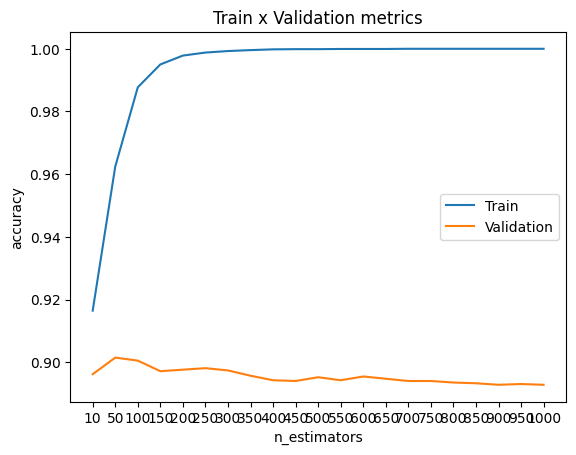

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimator in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = XGBClassifier(n_estimators=n_estimator).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

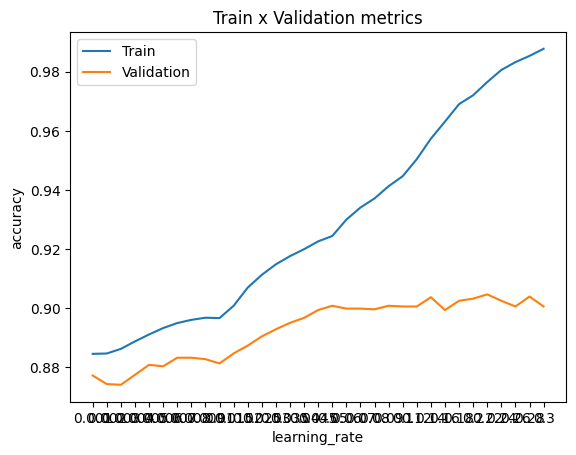

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for learning_rate in learning_rate_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = XGBClassifier(learning_rate=learning_rate).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('learning_rate')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(learning_rate_list )),labels=learning_rate_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
# 10, 0.5, 3, 0.005

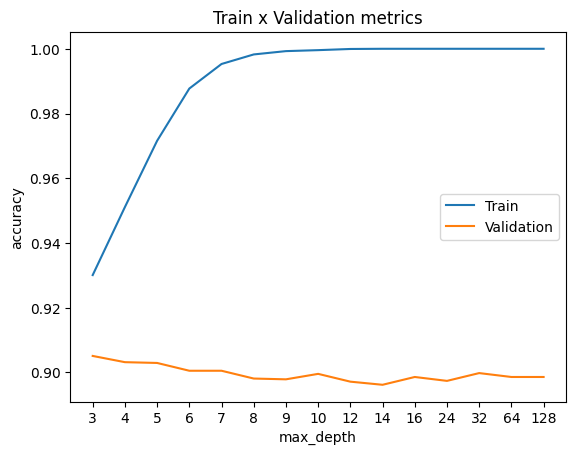

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list_xg:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = XGBClassifier(max_depth=max_depth).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list_xg )),labels=max_depth_list_xg)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

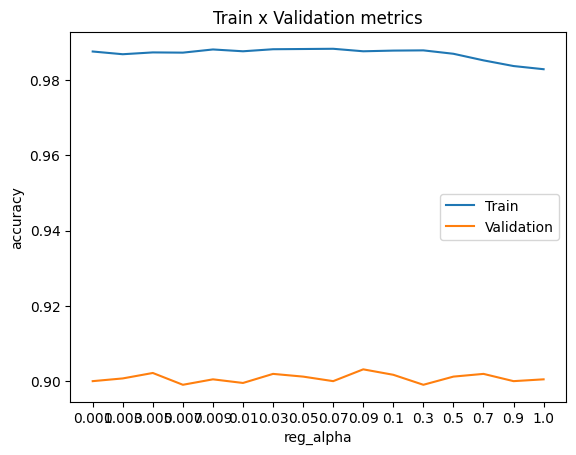

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for reg_alpha in reg_alpha_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = XGBClassifier(reg_alpha=reg_alpha).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('reg_alpha')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(reg_alpha_list )),labels=reg_alpha_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

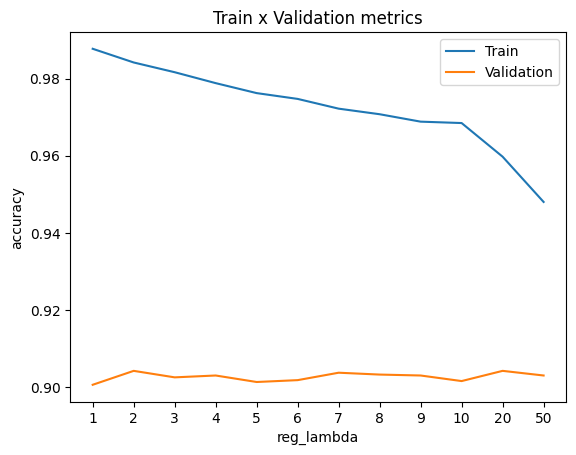

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for reg_lambda in reg_lambda_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = XGBClassifier(reg_lambda=reg_lambda).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('reg_lambda')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(reg_lambda_list )),labels=reg_lambda_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

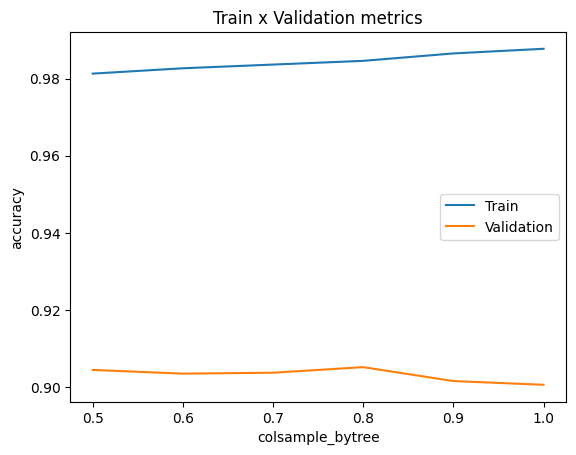

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for colsample_bytree in colsample_bytree_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = XGBClassifier(colsample_bytree=colsample_bytree).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('colsample_bytree')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(colsample_bytree_list)),labels=colsample_bytree_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

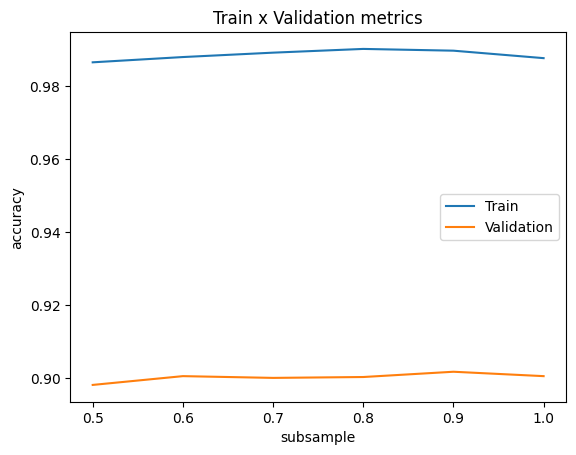

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for subsample in subsample_list :
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = XGBClassifier(subsample=subsample).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('subsample')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(subsample_list )),labels=subsample_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

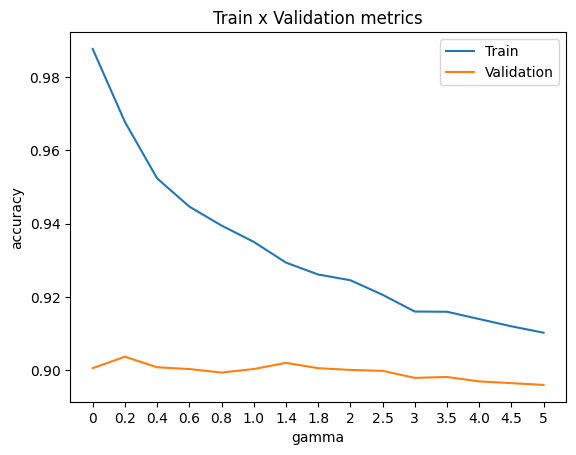

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for gamma in gamma_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = XGBClassifier(gamma=gamma).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(gamma_list )),labels=gamma_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
xgb_model_final = XGBClassifier(
                                learning_rate=0.5,
                                max_depth=3,
                                reg_alpha=0.7,
                                reg_lambda=50,
                                gamma=3,
                                subsample=0.9).fit(X_train,y_train)

In [ ]:
y_pred_proba = xgb_model_final.predict_proba(X_val)
y_pred = np.argmax(y_pred_proba,axis=1)

In [ ]:
# Calculate accuracy
accuracy = xgb_model_final.score(X_val, y_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.17%


In [ ]:
from sklearn.metrics import log_loss

# Calculate log loss
log_loss(y_val, y_pred_proba)

0.3073934580348722

In [ ]:
# Print classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       486
           1       0.87      0.88      0.88       616
           2       0.89      0.85      0.87       592
           3       0.95      0.97      0.96       644
           4       1.00      1.00      1.00       823
           5       0.82      0.80      0.81       487
           6       0.79      0.82      0.81       504

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



In [ ]:
preds_prob = xgb_model_final.predict_proba(test)
Predictions = np.argmax(preds_prob,axis=1)
submission_df = pd.DataFrame({"id":ids,"NObeyesdad":Predictions})

In [ ]:
decoders = {
    0:"Insufficient_Weight",
    1:"Normal_Weight",
    2:"Obesity_Type_I",
    3:"Obesity_Type_II",
    4:"Obesity_Type_III",
    5:"Overweight_Level_I",
    6:"Overweight_Level_II",
}
submission_df["NObeyesdad"]  = submission_df["NObeyesdad"].map(decoders)


In [ ]:
submission_df.to_csv('submission.csv',index=False)

In [ ]:
submission_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


# ***Stacking Classifier: (CatboostClassifier, XGBoostClassifier, LGBMClassifier, RandomForestClassifier)***

**Optimized using optuna**


In [ ]:
# follow all the general steps of machine learning modelling
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.0 MB/s eta 0:00:00


In [ ]:
# numpy
# pandas
# matplotlib.pyplot
import optuna      #
from optuna.samplers import TPESampler   #

#
import pickle
#
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, cross_val_predict
#
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# show all properties on display
pd.set_option('display.max_column', None)


train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
train.columns.tolist()

['id',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [ ]:
submission_id = test.id

train_ = train.drop(columns='id', axis=1)
test_ = test.drop(columns='id', axis=1)

In [ ]:
print(f'Train data: {train_.shape}')
print(f'Test data: {test_.shape}')

Train data: (20758, 17)
Test data: (13840, 16)


In [ ]:
train_.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [ ]:
has_inf = train_.isin([np.inf, -np.inf]).any().any()
has_inf

False

**Descriptive statistics of train data**


In [ ]:
train_.describe(include='object').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


**Check number of gaps for each feature**

In [ ]:
print(f'Train data \n  {train_.isna().sum()} \n')
print(f'Test data \n  {test_.isna().sum()} \n')

Train data 
  Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64 

Test data 
  Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                 

**Craft new features**


1.   BMI (weight/height**2)
2.   Meal_score (FCVC*NCP)
3.   TU_Score (TUE/age)





In [ ]:
train_['BMI'] = train_['Weight']/(train_['Height']**2)
test_['BMI'] = test_['Weight']/(test_['Height']**2)

train_['Meal_score'] = train_['FCVC'] * train_['NCP']
test_['Meal_score'] = test_['FCVC'] * test_['NCP']

train_['TU_Score'] = train_['TUE'] / train_['Age']
test_['TU_Score'] = test_['TUE'] / test_['Age']

In [ ]:
train_.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Meal_score,TU_Score
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756,30.241842,6.796596,0.028715
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113,8.333932,2.356030,0.029408
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.868541,1.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000,24.088223,6.000000,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887,29.384757,6.453894,0.022908
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000,37.011168,9.000000,0.047739
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000,54.997991,12.000000,0.142857


In [ ]:
train_.isin([np.inf, -np.inf]).sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
Meal_score                        0
TU_Score                          0
dtype: int64

Plot for each categorical feature

Female    10422
Male      10336
Name: Gender, dtype: int64 




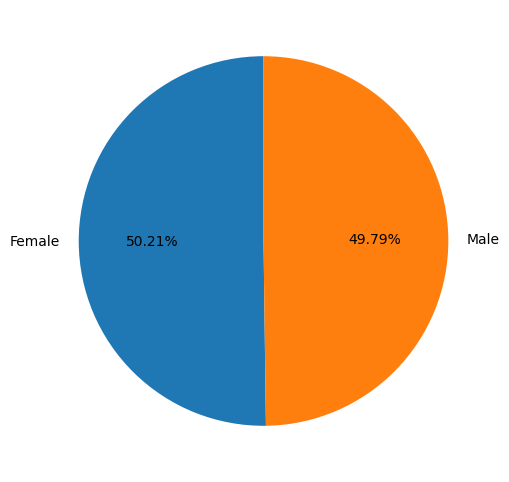

yes    17014
no      3744
Name: family_history_with_overweight, dtype: int64 




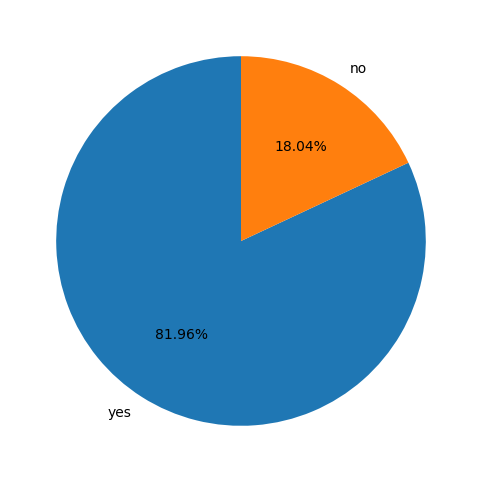

yes    18982
no      1776
Name: FAVC, dtype: int64 




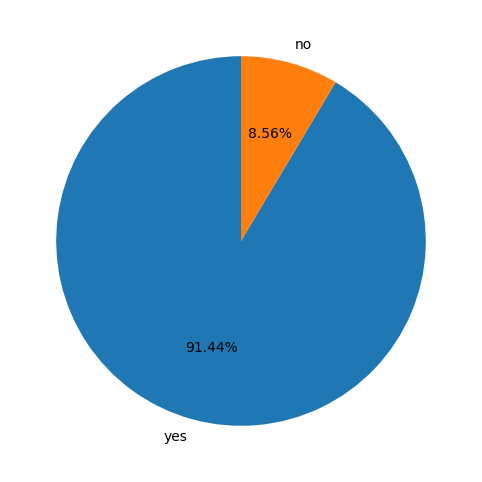

no     20513
yes      245
Name: SMOKE, dtype: int64 




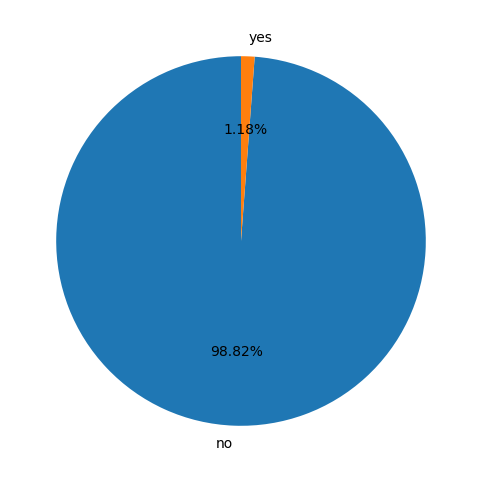

no     20071
yes      687
Name: SCC, dtype: int64 




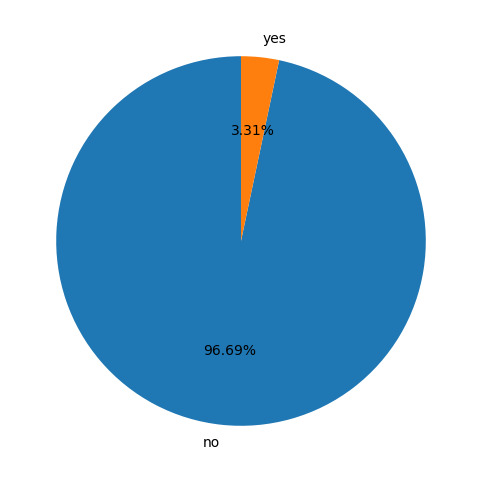

Sometimes     15066
no             5163
Frequently      529
Name: CALC, dtype: int64 




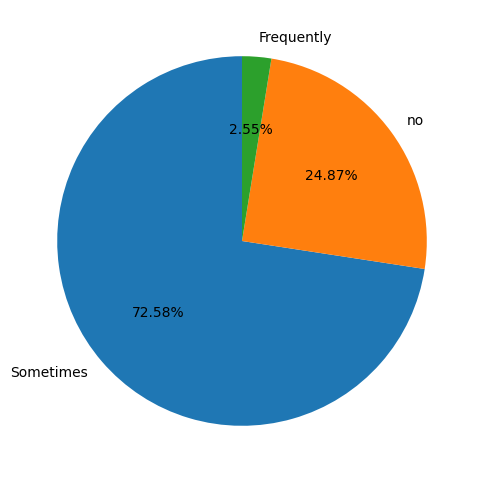

Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: MTRANS, dtype: int64 




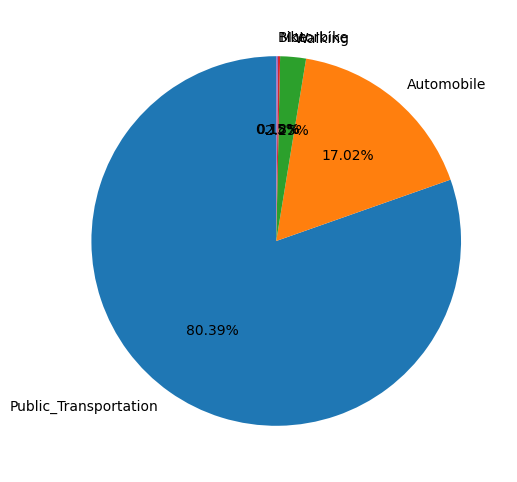

In [ ]:
for feature in ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']:
    plt.figure(figsize=(12, 6))
    aggregation = train_[feature].value_counts()
    print(aggregation, '\n\n')
    plt.pie(x=aggregation, labels=aggregation.index, autopct='%1.2f%%', startangle=90)
    plt.show()

Check duplicates in train_

In [ ]:
train_duplicates_number = train_[train_.duplicated()]

print(len(train_duplicates_number))

0


**Next Step: Drop Duplicates**

But train_ doesn't have any duplicate

**One-hot encoding**

In [ ]:
X = train_.drop(['NObeyesdad'], axis=1)
# X = pd.get_dummies(X, drop_first=True, dtype=int)
# test_ = pd.get_dummies(test_, drop_first=True, dtype=int)

X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Meal_score,TU_Score
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,28.259565,5.966594,0.039949
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,23.422091,6.000000,0.055556
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,17.126706,2.654722,0.092977
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,44.855798,9.000000,0.037236
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,25.599151,5.282883,0.029447


In [ ]:
encoder = LabelEncoder()
X['Gender'] = encoder.fit_transform(X['Gender'].values.reshape(-1, 1))
X['family_history_with_overweight'] = encoder.fit_transform(X['family_history_with_overweight'].values.reshape(-1, 1))
X['CAEC'] = encoder.fit_transform(X['CAEC'].values.reshape(-1, 1))
X['SMOKE'] = encoder.fit_transform(X['SMOKE'].values.reshape(-1, 1))
X['SCC'] = encoder.fit_transform(X['SCC'].values.reshape(-1, 1))
X['CALC'] = encoder.fit_transform(X['CALC'].values.reshape(-1, 1))
X['MTRANS'] = encoder.fit_transform(X['MTRANS'].values.reshape(-1, 1))
X['FCVC'] = encoder.fit_transform(X['FCVC'].values.reshape(-1, 1))
X['FAVC'] = encoder.fit_transform(X['FAVC'].values.reshape(-1, 1))


X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Meal_score,TU_Score
0,1,24.443011,1.699998,81.669950,1,1,233,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,28.259565,5.966594,0.039949
1,0,18.000000,1.560000,57.000000,1,1,233,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,23.422091,6.000000,0.055556
2,0,18.000000,1.711460,50.165754,1,1,181,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,17.126706,2.654722,0.092977
3,0,20.952737,1.710730,131.274851,1,1,933,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,44.855798,9.000000,0.037236
4,1,31.641081,1.914186,93.798055,1,1,654,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,25.599151,5.282883,0.029447


In [ ]:
# Encode target classes
encoder = LabelEncoder()
train_['NObeyesdad'] = encoder.fit_transform(train_['NObeyesdad'].values.reshape(-1, 1))
y = train_.NObeyesdad
y[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0    6
1    1
2    0
3    4
4    6
5    0
6    3
7    3
8    5
9    4
Name: NObeyesdad, dtype: int64

**Histogram of Distrubution**

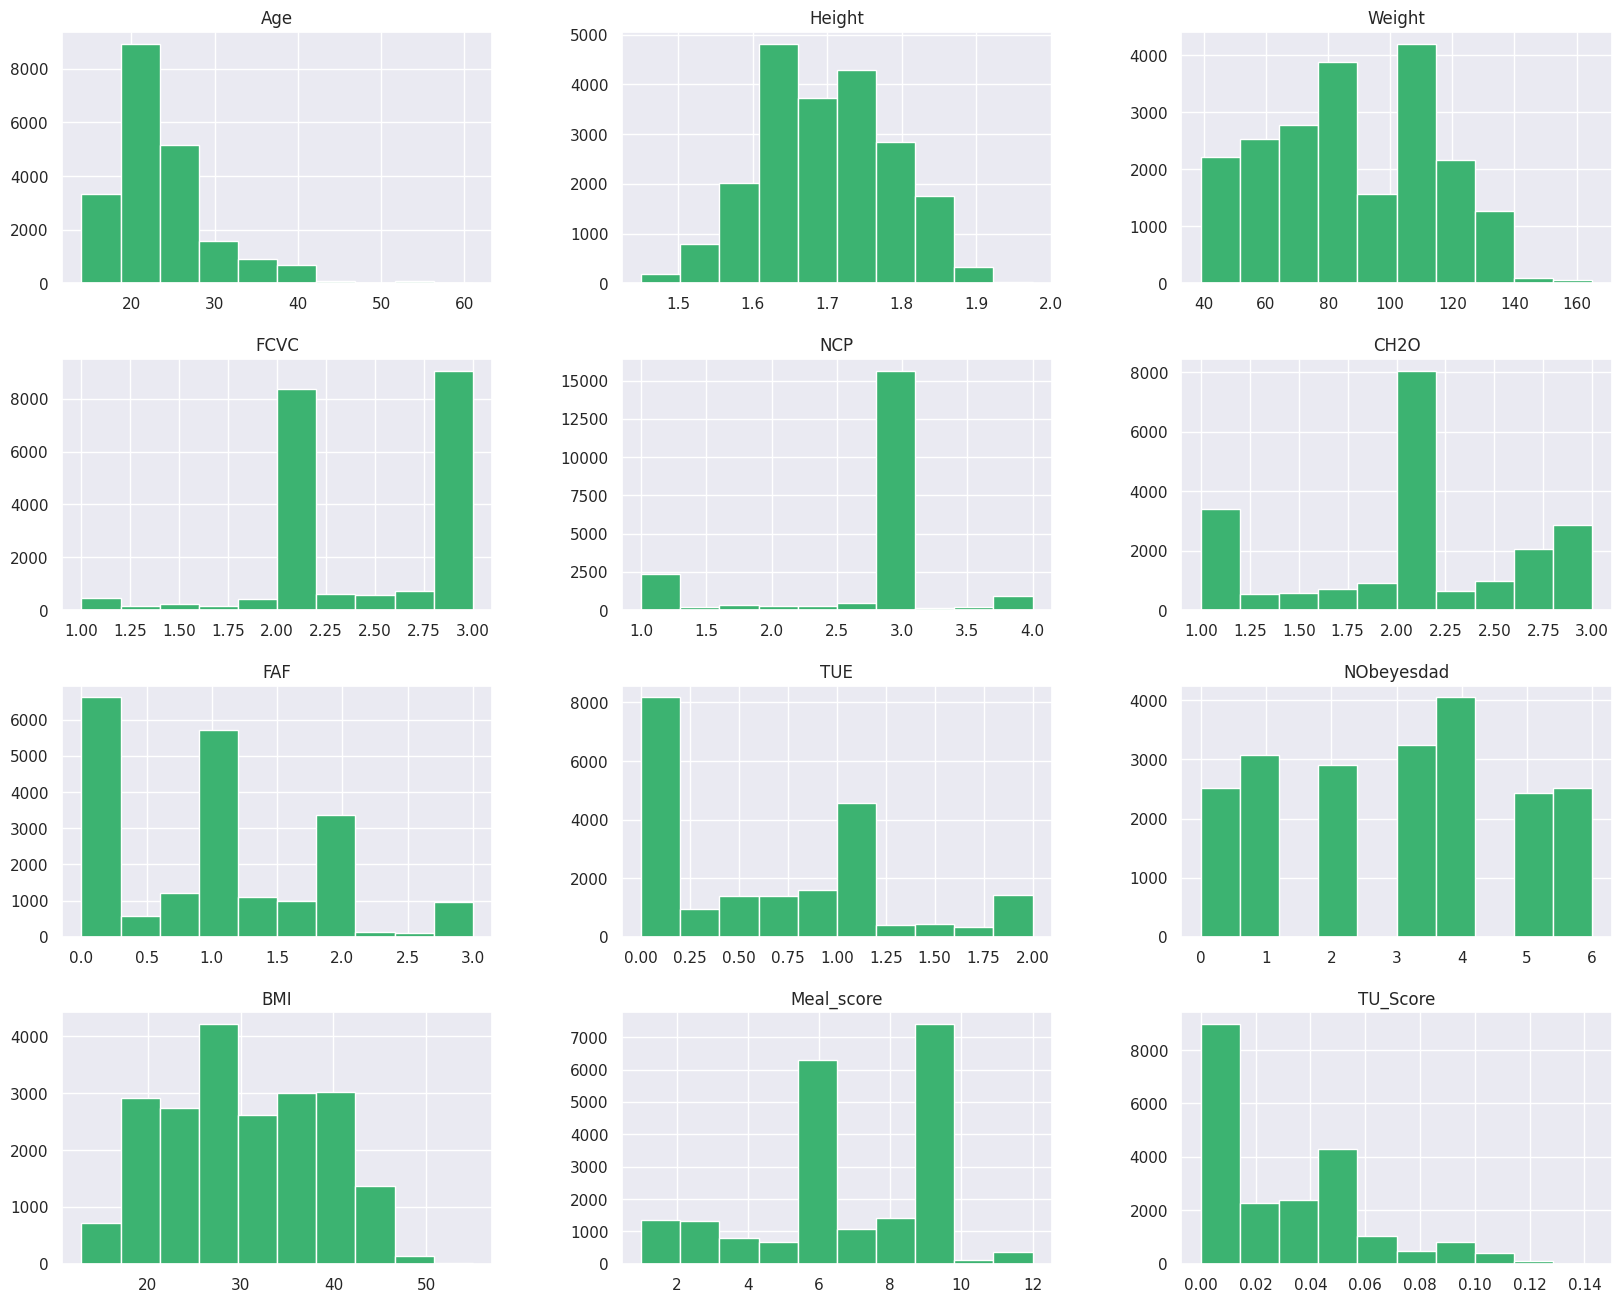

In [ ]:
sns.set(rc={'figure.figsize': (20, 16)})
train_.hist(color='#3cb371');

In [ ]:
# count target of train_ data
print(f'{y.value_counts()}\n\n')
print(y.value_counts() / y.shape[0])

4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: NObeyesdad, dtype: int64


4    0.194913
3    0.156470
1    0.148473
2    0.140187
0    0.121544
6    0.121495
5    0.116919
Name: NObeyesdad, dtype: float64


**Transform data with logarithm**

In [ ]:
test_.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Meal_score,TU_Score
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,35.315411,8.815848,0.000000
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,25.781250,2.000000,0.000000
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,41.324115,9.000000,0.009635
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,42.976937,5.955818,0.000000
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,39.584143,9.000000,0.028503


In [ ]:
encoder = LabelEncoder()
test_['Gender'] = encoder.fit_transform(test_['Gender'].values.reshape(-1, 1))
test_['family_history_with_overweight'] = encoder.fit_transform(test_['family_history_with_overweight'].values.reshape(-1, 1))
test_['CAEC'] = encoder.fit_transform(test_['CAEC'].values.reshape(-1, 1))
test_['SMOKE'] = encoder.fit_transform(test_['SMOKE'].values.reshape(-1, 1))
test_['SCC'] = encoder.fit_transform(test_['SCC'].values.reshape(-1, 1))
test_['CALC'] = encoder.fit_transform(test_['CALC'].values.reshape(-1, 1))
test_['MTRANS'] = encoder.fit_transform(test_['MTRANS'].values.reshape(-1, 1))
test_['FCVC'] = encoder.fit_transform(test_['FCVC'].values.reshape(-1, 1))
test_['FAVC'] = encoder.fit_transform(test_['FAVC'].values.reshape(-1, 1))


test_.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Meal_score,TU_Score
0,1,26.899886,1.848294,120.644178,1,1,762,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3,35.315411,8.815848,0.000000
1,0,21.000000,1.600000,66.000000,1,1,187,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3,25.781250,2.000000,0.000000
2,0,26.000000,1.643355,111.600553,1,1,827,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3,41.324115,9.000000,0.009635
3,1,20.979254,1.553127,103.669116,1,1,187,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3,42.976937,5.955818,0.000000
4,0,26.000000,1.627396,104.835346,1,1,827,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3,39.584143,9.000000,0.028503


In [ ]:
print(X.dtypes)

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                                int64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
BMI                               float64
Meal_score                        float64
TU_Score                          float64
dtype: object


In [ ]:
# Logarithmic Normalization
# for column in X.columns.tolist():
#     X[column] = X[column].apply(lambda x: np.log(x + 1))

# # Transform test data
# for column in test_.columns.tolist():
#     test_[column] = test_[column].apply(lambda x: np.log(x + 1))

# X.hist(color='#3cb371');

In [ ]:
# mean Normalization
# Normalize training data
for column in X.columns.tolist():
    print(column)
    mean_value = X[column].mean()
    std_dev = X[column].std()
    print(mean_value)
    X[column] = (X[column] - mean_value) / std_dev
    print(test_[column])
    test_[column] = (test_[column] - mean_value) / std_dev
    print(test_[column])

# print('\n')
# # Normalize test data (using training data mean and std)
# for column in test_.columns.tolist():
#     print(column)
#     mean_value = X[column].mean()
#     std_dev = X[column].std()
#     print(mean_value)
#     test_[column] = (test_[column] - mean_value) / std_dev


# X.hist(color='#3cb371');

Gender
0.497928509490317
0        1
1        0
2        0
3        1
4        0
        ..
13835    1
13836    0
13837    0
13838    1
13839    1
Name: Gender, Length: 13840, dtype: int64
0        1.004127
1       -0.995842
2       -0.995842
3        1.004127
4       -0.995842
           ...   
13835    1.004127
13836   -0.995842
13837   -0.995842
13838    1.004127
13839    1.004127
Name: Gender, Length: 13840, dtype: float64
Age
23.841804418681953
0        26.899886
1        21.000000
2        26.000000
3        20.979254
4        26.000000
           ...    
13835    23.327836
13836    29.000000
13837    22.935612
13838    21.000000
13839    26.490926
Name: Age, Length: 13840, dtype: float64
0        0.537631
1       -0.499608
2        0.379425
3       -0.503255
4        0.379425
           ...   
13835   -0.090359
13836    0.906844
13837   -0.159315
13838   -0.499608
13839    0.465733
Name: Age, Length: 13840, dtype: float64
Height
1.7002449351575297
0        1.848294
1        1.600

In [ ]:
X[:10]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Meal_score,TU_Score
0,1.004127,0.105696,-0.002828,-0.235707,0.469088,0.305872,-0.955810,0.314676,0.337836,-0.109284,1.206565,-0.185005,-1.171113,0.597424,-0.471277,0.429308,-0.237856,-0.352289,0.382024
1,-0.995842,-1.027027,-1.606252,-1.170903,0.469088,0.305872,-0.955810,0.338356,-1.889159,-0.109284,-0.048348,-0.185005,0.021774,0.636498,1.639807,-2.182272,-0.818311,-0.338110,0.912722
2,-0.995842,-1.027027,0.128448,-1.429978,0.469088,0.305872,-1.109188,-1.913377,0.337836,-0.109284,-0.195640,-0.185005,-0.138019,1.755197,1.639807,0.429308,-1.573703,-1.757989,2.185224
3,-0.995842,-0.507917,0.120087,1.644731,0.469088,0.305872,1.108885,0.338356,0.337836,-0.109284,-0.584021,-0.185005,0.579882,0.271448,-0.471277,0.429308,1.753549,0.935219,0.289775
4,1.004127,1.371163,2.450308,0.224049,0.469088,0.305872,0.285957,-1.119774,0.337836,-0.109284,-0.081467,-0.185005,1.176457,0.523099,-0.471277,0.429308,-0.557083,-0.642485,0.024893
5,1.004127,-1.004480,0.552949,-1.377405,0.469088,0.305872,0.843425,0.338356,0.337836,-0.109284,0.177712,-0.185005,1.131199,0.636498,-0.471277,0.429308,-1.605474,0.833036,0.899357
6,1.004127,1.062085,0.623810,0.941538,0.469088,0.305872,-0.979407,0.338356,0.337836,-0.109284,-0.048348,-0.185005,-1.171113,0.133184,-0.471277,-2.182272,0.764219,-0.349264,-0.183352
7,1.004127,1.063571,0.571572,1.149334,0.469088,0.305872,-1.424791,0.338356,0.337836,-0.109284,-0.048348,-0.185005,-0.456985,-1.024319,-0.471277,-2.182272,1.001881,-1.105331,-0.976429
8,1.004127,-1.202834,-0.002805,-0.678095,-2.131694,0.305872,-0.955810,0.338356,0.337836,-0.109284,1.595126,5.405000,0.021774,0.636498,1.639807,0.429308,-0.722395,-0.338110,1.023848
9,-0.995842,0.379425,-0.703328,0.886595,0.469088,0.305872,1.108885,0.338356,0.337836,-0.109284,0.990744,-0.185005,-1.171113,-0.661190,-0.471277,0.429308,1.342645,0.935219,-0.690469


In [ ]:
test_.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Meal_score,TU_Score
0,1.004127,0.537631,1.695634,1.241740,0.469088,0.305872,0.604510,0.338356,0.337836,-0.109284,1.308552,-0.185005,-0.150717,-1.024319,1.639807,0.429308,0.608785,0.857057,-0.976429
1,-0.995842,-0.499608,-1.148124,-0.829728,0.469088,0.305872,-1.091490,-2.497017,0.337836,-0.109284,1.595126,-0.185005,0.021774,-1.024319,1.639807,0.429308,-0.535233,-2.035881,-0.976429
2,-0.995842,0.379425,-0.651571,0.898911,0.469088,0.305872,0.796232,0.338356,0.337836,-0.109284,0.973691,-0.185005,-1.171113,-0.608281,1.639807,0.429308,1.329777,0.935219,-0.648804
3,1.004127,-0.503255,-1.684970,0.598244,0.469088,0.305872,-1.091490,0.307038,0.337836,-0.109284,1.244108,-0.185005,-1.057967,-1.024319,1.639807,0.429308,1.528102,-0.356862,-0.976429
4,-0.995842,0.379425,-0.834353,0.642454,0.469088,0.305872,0.796232,0.338356,0.337836,-0.109284,1.025713,-0.185005,-1.171113,0.206461,1.639807,0.429308,1.120996,0.935219,-0.007204


**Pie plot of target**

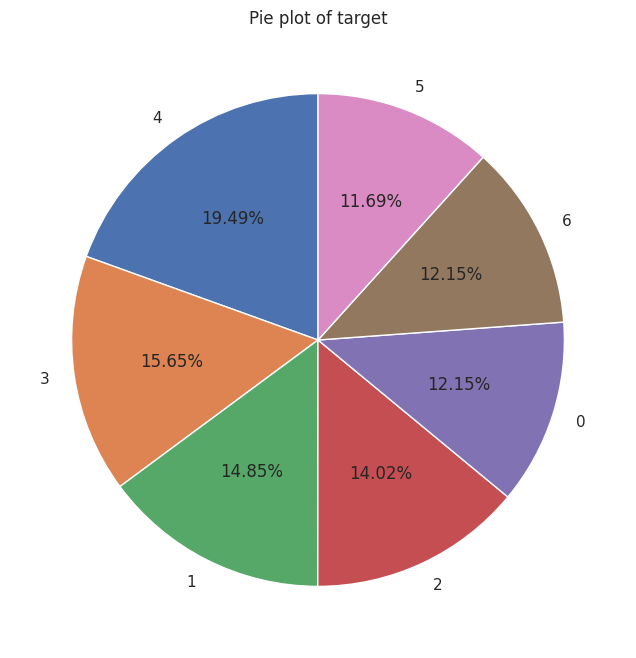

In [ ]:
label_counts = y.value_counts()

plt.figure(figsize=(12, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Pie plot of target')
plt.show();

In [ ]:
X.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
BMI                               0
Meal_score                        0
TU_Score                          0
dtype: int64

**Feature Importance**

Feature importance in machine learning refers to techniques that **rank and score the individual features** within a dataset based on their **contribution to the model's predictions.** In simpler words, it tells you **which features have the most influence on the outcome predicted by your model.**

Think of it like this: imagine you're trying to predict house prices, and you have features like square footage, number of bedrooms, and distance to the beach. Feature importance can tell you if "square footage" is having a much bigger impact on the predicted price compared to "distance to the beach".

Here's why feature importance is valuable:

**Understanding your data:** It helps you interpret how your data works and identify the most important factors influencing your target variable.

**Improving model performance:** You can use it to remove irrelevant features that might be adding noise and focus on the most informative ones, potentially leading to better predictions.

**Debugging and troubleshooting:** If your model isn't performing well, feature importance can help you pinpoint features that might be causing issues.


However, it's important to remember that:

**Different models use different methods:** Each machine learning model might have its own way of calculating feature importance, so the scores might not be directly comparable across different models.

**Interpretability varies:** Some methods are easier to interpret than others. For example, feature importance in Decision Trees is readily visualized, while in Neural Networks, it might be more complex.

**Not a perfect science:** Feature importance can be influenced by factors like model complexity and data quality. It's a tool to guide your understanding, not an absolute truth.


Here are some common methods for calculating feature importance:

**Mean Decrease Impurity (Tree-based models):** Measures how much a feature splits the data and reduces uncertainty at each node in the tree.

**Permutation Importance:** Randomly shuffles a feature's values and observes how much the model's performance changes.

**Weight-based methods (Linear models):** Analyzes the weights assigned to each feature in the model.

By understanding and utilizing feature importance effectively, you can gain valuable insights into your data and build better machine learning models.



In [ ]:
%%time
best_rf = RandomForestClassifier(
    n_estimators=518,
    criterion='gini',
    min_samples_leaf=1,
    max_depth=73,
    min_samples_split=2,
    random_state=27,
)

best_rf.fit(X, y)
importance = best_rf.feature_importances_
feature_importance = pd.DataFrame(data=importance, index=X.columns, columns=['importance']) \
    .sort_values(ascending=True, by='importance')
feature_importance.plot(kind='barh', figsize=(12, 8), color='#3cb371');

KeyboardInterrupt: 

**Build a heat map of correlations**



*   what is meant by heat map of correlations and why is it used - gemini



Determining which features have high correlations in a heatmap of correlations involves looking for specific visual cues:

Color intensity:

**Darker colors:** Indicate **strong correlations, either positive (warm colors) or negative (cool colors).**
**Lighter colors:** Suggest **weaker correlations or no correlation (white)**.

**Threshold values:**

Define a threshold for what you consider "high" correlation based on your data and analysis goals. Common thresholds used are 0.7 or 0.8 for strong positive/negative correlations.

**Specific patterns:**

**Large blocks of dark colors:** Highlight clusters of highly correlated features.

**Diagonal bands:** Indicate potential multicollinearity (variables highly correlated with themselves).
**Isolated dark squares:** Emphasize strong pairwise correlations between specific features.

**Additional tips:**

**Use a colorbar:** It displays the range of correlation values represented by the color spectrum, helping you pinpoint specific values quickly.

**Zoom in:** Focus on specific areas of the heatmap to examine correlations in detail.

**Use clustering algorithms:** Automatically group features with high correlations to identify clusters.

**Consider correlation coefficient values:** While color is helpful, inspecting the actual correlation coefficient values (often displayed in the cells) provides precise numerical comparisons.

**Remember:**

Interpretation depends on your specific context and analysis goals.
Consider both magnitude and direction of correlations (positive or negative).
Use other data analysis techniques alongside heatmaps for a comprehensive understanding.
By combining these visual cues, thresholding, and further analysis, you can effectively identify features with high correlations in your heatmap, aiding in feature selection, data exploration, and various tasks depending on your domain

In [ ]:
correlation = X.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Meal_score,TU_Score
Gender,1.000000,0.066530,0.623507,0.118613,0.095786,0.021812,-0.347843,0.039468,0.046129,0.063349,0.053298,-0.061442,0.238399,0.058696,0.037345,-0.140049,-0.091479,-0.178746,0.043429
Age,0.066530,1.000000,-0.011713,0.283381,0.261575,0.056848,0.019774,-0.048479,0.151498,0.056006,-0.016325,-0.108855,-0.192259,-0.296154,-0.070323,-0.605345,0.320842,-0.011239,-0.405641
Height,0.623507,-0.011713,1.000000,0.416677,0.228137,0.115566,-0.082748,0.191383,0.069003,0.069748,0.183706,-0.095923,0.295278,0.076433,-0.089138,-0.049543,0.098126,0.090222,0.065638
Weight,0.118613,0.283381,0.416677,1.000000,0.514147,0.228770,0.252035,0.095947,0.337331,0.040416,0.317914,-0.185116,-0.084845,-0.086471,-0.216673,-0.008431,0.941071,0.241049,-0.154120
family_history_with_overweight,0.095786,0.261575,0.228137,0.514147,1.000000,0.152154,0.037527,0.044778,0.204263,0.018782,0.191588,-0.166760,-0.094414,0.005762,0.002330,-0.109662,0.498820,0.079110,-0.043046
FAVC,0.021812,0.056848,0.115566,0.228770,0.152154,1.000000,0.011361,0.011522,0.115675,-0.016009,0.039167,-0.111897,-0.067030,0.034843,-0.080184,-0.026666,0.215523,0.018197,0.024661
FCVC,-0.347843,0.019774,-0.082748,0.252035,0.037527,0.011361,1.000000,0.125779,-0.015867,-0.014395,0.097273,0.024531,-0.104918,-0.147766,-0.148435,0.109027,0.308284,0.709070,-0.160888
NCP,0.039468,-0.048479,0.191383,0.095947,0.044778,0.011522,0.125779,1.000000,-0.089957,0.006820,0.080949,0.006633,0.100871,0.067459,-0.099421,-0.001813,0.048736,0.761150,0.074771
CAEC,0.046129,0.151498,0.069003,0.337331,0.204263,0.115675,-0.015867,-0.089957,1.000000,-0.019703,0.132820,-0.099427,-0.092035,-0.049646,-0.066821,-0.051645,0.350495,-0.055847,-0.073719
SMOKE,0.063349,0.056006,0.069748,0.040416,0.018782,-0.016009,-0.014395,0.006820,-0.019703,1.000000,-0.023475,0.017185,0.008374,-0.016093,-0.023254,-0.022203,0.013129,-0.004501,-0.025757


****Define base models with tuned hyperparameters****

**Using Optuna for hyperparameter optimization**

In [ ]:
%%time
def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 100, 1000),
        criterion=trial.suggest_categorical("criterion", ['gini', 'entropy', 'log_loss']),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 100),
        max_depth=trial.suggest_int("max_depth", 1, 100),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 100),
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=27)
study = optuna.create_study(study_name="random_forest", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
print()

Number of finished trials:  100
Best trial:
  Value:  0.9046242774566474
  Params: 
    n_estimators: 619
    criterion: entropy
    min_samples_leaf: 1
    max_depth: 33
    min_samples_split: 8

CPU times: user 26min 2s, sys: 2.22 s, total: 26min 5s
Wall time: 26min 8s


In [ ]:
%%time
def objective(trial):
    model = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1.0, log=True),
        colsample_bylevel=trial.suggest_float("colsample_bylevel", 0.1, 0.9),
        min_data_in_leaf=trial.suggest_int("min_data_in_leaf", 1, 100),
        depth=trial.suggest_int("depth", 2, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        early_stopping_rounds=trial.suggest_int("early_stopping_rounds", 10, 50),
        verbose=False
    )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=27)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=20)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
print()

Number of finished trials:  20
Best trial:
  Value:  0.8990847784200385
  Params: 
    iterations: 303
    learning_rate: 0.27974003670858916
    colsample_bylevel: 0.5699992746880528
    min_data_in_leaf: 74
    depth: 6
    l2_leaf_reg: 0.09265573124322937
    bagging_temperature: 1.069817186130293
    early_stopping_rounds: 27

CPU times: user 6min 20s, sys: 19.9 s, total: 6min 39s
Wall time: 4min 17s


In [ ]:
%%time
def objective(trial):
    model = LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 100, 1000),
        max_depth=trial.suggest_int("max_depth", 1, 100),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        objective='multiclass',
        verbosity=-1,
        boosting_type=trial.suggest_categorical('boosting_type', ['gbdt', 'rf', 'dart']),
        num_leaves=trial.suggest_int('num_leaves', 2, 256),
        bagging_fraction=trial.suggest_float('bagging_fraction', 0.4, 1.0),
        bagging_freq=trial.suggest_int('bagging_freq', 1, 7),
        min_child_samples=trial.suggest_int('min_child_samples', 5, 100)
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=27)
study = optuna.create_study(study_name="lgbm", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
print()



In [ ]:
%%time
def objective(trial):
    model = XGBClassifier(
        max_depth=trial.suggest_int('max_depth', 1, 100),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        n_estimators=trial.suggest_int('n_estimators', 50, 1000),
        min_child_weight=trial.suggest_int('min_child_weight', 1, 10),
        gamma=trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        subsample=trial.suggest_float('subsample', 0.01, 1.0, log=True),
        colsample_bytree=trial.suggest_float('colsample_bytree', 0.01, 1.0, log=True),
        reg_alpha=trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        reg_lambda=trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        eval_metric='mlogloss',
        use_label_encoder=False,
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=27)
study = optuna.create_study(study_name="xgb", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
print()



Number of finished trials:  100
Best trial:
  Value:  0.9130539499036608
  Params: 
    max_depth: 10
    learning_rate: 0.02669196672712223
    n_estimators: 357
    min_child_weight: 3
    gamma: 0.003355054462229533
    subsample: 0.8027178565192761
    colsample_bytree: 0.4138041490941429
    reg_alpha: 0.0007754726740092238
    reg_lambda: 1.1944033402307114e-06

CPU times: user 29min 9s, sys: 16.1 s, total: 29min 25s
Wall time: 16min 4s


**Base Model**

In [ ]:
base_models = [
    ('catboost', CatBoostClassifier(
        iterations=303,
        learning_rate=0.27974003670858916,
        colsample_bylevel=0.5699992746880528,
        min_data_in_leaf=74,
        depth=6,
        l2_leaf_reg=0.09265573124322937,
        bagging_temperature=1.069817186130293,
        early_stopping_rounds=27,
    )),
    ('xgboost', XGBClassifier(
        max_depth=10,
        learning_rate=0.02669196672712223,
        n_estimators=357,
        min_child_weight=3,
        gamma=0.003355054462229533,
        subsample=0.8027178565192761,
        colsample_bytree=0.4138041490941429,
        reg_alpha=0.0007754726740092238,
        reg_lambda=1.1944033402307114e-06,
    )),
    # ('lightgbm', LGBMClassifier(
    #     n_estimators=999,
    #     max_depth=56,
    #     learning_rate=0.007760118793849724,
    #     boosting_type='gbdt',
    #     num_leaves=52,
    #     bagging_fraction=0.4315009334977021,
    #     bagging_freq=2,
    #     min_child_samples=64,
    # )),
    ('random_forest', RandomForestClassifier(
        n_estimators=619,
        criterion='entropy',
        min_samples_leaf=1,
        max_depth=33,
        min_samples_split=8,
    )),
]

**Meta model**

In [ ]:
meta_model = XGBClassifier(
    max_depth=10,
    learning_rate=0.02669196672712223,
    n_estimators=357,
    min_child_weight=3,
    gamma=0.003355054462229533,
    subsample=0.8027178565192761,
    colsample_bytree=0.4138041490941429,
    reg_alpha=0.0007754726740092238,
    reg_lambda=1.1944033402307114e-06,
)

In [ ]:
%%time
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=27)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X, y)

0:	learn: 1.1532739	total: 81.9ms	remaining: 24.7s
1:	learn: 0.9039063	total: 118ms	remaining: 17.7s
2:	learn: 0.7440577	total: 159ms	remaining: 15.9s
3:	learn: 0.6395349	total: 194ms	remaining: 14.5s
4:	learn: 0.5645219	total: 234ms	remaining: 14s
5:	learn: 0.5126280	total: 269ms	remaining: 13.3s
6:	learn: 0.4776029	total: 306ms	remaining: 12.9s
7:	learn: 0.4471007	total: 342ms	remaining: 12.6s
8:	learn: 0.4264322	total: 391ms	remaining: 12.8s
9:	learn: 0.4099659	total: 422ms	remaining: 12.4s
10:	learn: 0.3936848	total: 457ms	remaining: 12.1s
11:	learn: 0.3821970	total: 493ms	remaining: 12s
12:	learn: 0.3683550	total: 534ms	remaining: 11.9s
13:	learn: 0.3606674	total: 567ms	remaining: 11.7s
14:	learn: 0.3529695	total: 601ms	remaining: 11.5s
15:	learn: 0.3455285	total: 637ms	remaining: 11.4s
16:	learn: 0.3397754	total: 674ms	remaining: 11.3s
17:	learn: 0.3336702	total: 711ms	remaining: 11.3s
18:	learn: 0.3298256	total: 746ms	remaining: 11.1s
19:	learn: 0.3247623	total: 786ms	remaining:

StackingClassifier(estimators=[('catboost',
                                <catboost.core.CatBoostClassifier object at 0x788975afce20>),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.4138041490941429,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.02669196672712223,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=10, max_leaves=None,
                                                 min_child_weight=3,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=357, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

**Predict Validation Set**

In [ ]:
y_pred_val = stacking_model.predict(X_val)

accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy Score: {accuracy_val:.8f}")

Validation Accuracy Score: 0.97350674


**Predict Test Data**

In [ ]:
test_.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Meal_score,TU_Score
0,1.004127,0.537631,1.695634,1.241740,0.469088,0.305872,0.604510,0.338356,0.337836,-0.109284,1.308552,-0.185005,-0.150717,-1.024319,1.639807,0.429308,0.608785,0.857057,-0.976429
1,-0.995842,-0.499608,-1.148124,-0.829728,0.469088,0.305872,-1.091490,-2.497017,0.337836,-0.109284,1.595126,-0.185005,0.021774,-1.024319,1.639807,0.429308,-0.535233,-2.035881,-0.976429
2,-0.995842,0.379425,-0.651571,0.898911,0.469088,0.305872,0.796232,0.338356,0.337836,-0.109284,0.973691,-0.185005,-1.171113,-0.608281,1.639807,0.429308,1.329777,0.935219,-0.648804
3,1.004127,-0.503255,-1.684970,0.598244,0.469088,0.305872,-1.091490,0.307038,0.337836,-0.109284,1.244108,-0.185005,-1.057967,-1.024319,1.639807,0.429308,1.528102,-0.356862,-0.976429
4,-0.995842,0.379425,-0.834353,0.642454,0.469088,0.305872,0.796232,0.338356,0.337836,-0.109284,1.025713,-0.185005,-1.171113,0.206461,1.639807,0.429308,1.120996,0.935219,-0.007204


In [ ]:

X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,Meal_score,TU_Score
0,1.004127,0.105696,-0.002828,-0.235707,0.469088,0.305872,-0.955810,0.314676,0.337836,-0.109284,1.206565,-0.185005,-1.171113,0.597424,-0.471277,0.429308,-0.237856,-0.352289,0.382024
1,-0.995842,-1.027027,-1.606252,-1.170903,0.469088,0.305872,-0.955810,0.338356,-1.889159,-0.109284,-0.048348,-0.185005,0.021774,0.636498,1.639807,-2.182272,-0.818311,-0.338110,0.912722
2,-0.995842,-1.027027,0.128448,-1.429978,0.469088,0.305872,-1.109188,-1.913377,0.337836,-0.109284,-0.195640,-0.185005,-0.138019,1.755197,1.639807,0.429308,-1.573703,-1.757989,2.185224
3,-0.995842,-0.507917,0.120087,1.644731,0.469088,0.305872,1.108885,0.338356,0.337836,-0.109284,-0.584021,-0.185005,0.579882,0.271448,-0.471277,0.429308,1.753549,0.935219,0.289775
4,1.004127,1.371163,2.450308,0.224049,0.469088,0.305872,0.285957,-1.119774,0.337836,-0.109284,-0.081467,-0.185005,1.176457,0.523099,-0.471277,0.429308,-0.557083,-0.642485,0.024893


In [ ]:
# test_1 = test_.drop(['CALC_Frequently'], axis=1)

In [ ]:
y_pred_test = stacking_model.predict(test_)
y_pred_test[:10]

array([3, 5, 2, 2, 2, 0, 0, 1, 6, 1])

**Submission DataFrame**

In [ ]:
submission_df = pd.DataFrame({
    'id': submission_id,
    'NObeyesdad': y_pred_test
})


In [ ]:
submission_df.head()

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,2
3,20761,2
4,20762,2


In [ ]:
decoders = {
    0:"Insufficient_Weight",
    1:"Normal_Weight",
    2:"Obesity_Type_I",
    3:"Obesity_Type_II",
    4:"Obesity_Type_III",
    5:"Overweight_Level_I",
    6:"Overweight_Level_II",
}
submission_df["NObeyesdad"]  = submission_df["NObeyesdad"].map(decoders)

In [ ]:
# Save submission file
submission_df.to_csv('submission.csv',index=False)

In [ ]:
submission_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_I
3,20761,Obesity_Type_I
4,20762,Obesity_Type_I
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight
